In [1]:
import torch

from PIL import Image
from lavis.models import load_model_and_preprocess

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c106SymInt8toSymIntENS_13intrusive_ptrINS_14SymIntNodeImplENS_6detail34intrusive_target_default_null_typeIS2_EEEE
  warn(f"Failed to load image Python extension: {e}")
/opt/conda/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [2]:
torch.cuda.is_available()

True

In [3]:
model, vis_preprocess, txt_preprocess = load_model_and_preprocess("blip_diffusion", "base", device="cuda", is_eval=True)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/opt/conda/lib/python3.8/site-packages/diffusers/configuration_utils.py:215: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality

No ctx_embeddings_cache found in /export/share/dongxuli/zerobooth/500000-renamed/


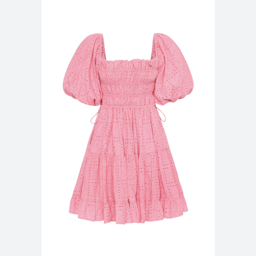

In [32]:
# src_subject = "cat"
# tgt_subject = "dog"
# prompt = "sit on sofa"
src_subject = "dress"
tgt_subject = "dress"
prompt = "a woman wears the dress"
# prompt = "dress"

src_subject = txt_preprocess["eval"](src_subject)
tgt_subject = txt_preprocess["eval"](tgt_subject)
prompt = [txt_preprocess["eval"](prompt)]

# image = Image.open("../images/dog.png").convert("RGB")
image = Image.open("../images/pink-dress.png").convert("RGB")
# image = Image.open("../images/green-skirt.png").convert("RGB")
input_images = vis_preprocess["eval"](image).unsqueeze(0).cuda()

# raw_image = Image.open("../images/cat-sofa.png").convert("RGB")
raw_image = Image.open("../images/dress-model.png").convert("RGB")

display(image.resize((256, 256)))

In [33]:
samples = {
    "input_images": input_images,
    "src_subject": src_subject,
    "tgt_subject": tgt_subject,
    "prompt": prompt,
    "raw_image": raw_image,
}

/export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/models/blip_diffusion_models/blip_diffusion.py:333: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  self.unet.in_channels,
100%|██████████| 50/50 [00:03<00:00, 16.09it/s]


['a dress a woman wears the dress', 'a sks sks sks sks sks sks sks sks sks sks sks sks sks sks sks sks dress a woman wears the dress']
Computing BLIP embeddings for 1 subjects


100%|██████████| 50/50 [00:08<00:00,  5.68it/s]


Before editing:


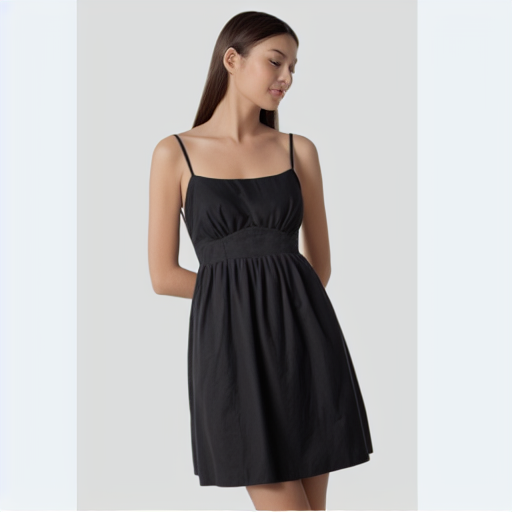

After editing:


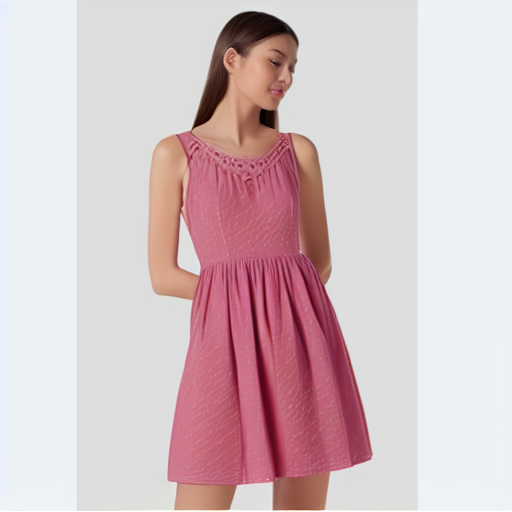

In [34]:
iter_seed = 88871
guidance_scale = 7.5
# guidance_scale = 1.0
num_inference_steps = 50
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

output = model.edit(
    samples,
    seed=iter_seed,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    neg_prompt=negative_prompt,
)

print("=" * 30)
print("Before editing:")
display(output[0])

print("After editing:")
display(output[1])

In [35]:
output[0].size

(512, 512)